# 本库的基本用法

## 目前主要包含以下几个功能

- 计算原子温度
- 计算原子结构熵
- 计算中心对称参数
- 建立简单晶体模型
- 建立原子近邻列表

## 导入必要的package

In [1]:
import mdapy as mp # 无特殊说明本库简写为 mp
import numpy as np
mp.init(arch="cpu") #arch="cpu" 使用CPU. # arch="gpu", device_memory_GB=6. 使用GPU, the case is memory costed!!!

[Taichi] version 1.1.2, llvm 10.0.0, commit f25cf4a2, win, python 3.8.13


D:\Anaconda\envs\mda\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[Taichi] Starting on arch=x64


## 查看版本号

In [2]:
mp.__version__

'0.5.0'

## 读取一个系统
内网可在此处下载[mdapy.example.dump](http://10.50.129.31:5212/s/n2id)文件

外网可在此处下载[mdapy.example.dump](http://yunpan.mushroomfire.com/s/JkUg)文件

In [3]:
%%time
system = mp.System('mdapy.example.dump') 

CPU times: total: 2.91 s
Wall time: 2.91 s


## 查看系统数据

In [4]:
system.data

,type,id,x,y,z,vx,vy,vz,csp_lammps,entropy_lammps
0,1,1,-50.3288,1.082210,0.177314,-2.002540,0.826811,-2.007010,0.000000,-17.41350
1,2,4,-28.8172,1.793390,2.342710,-5.216100,-2.418830,-1.374500,12.171200,-2.53738
2,5,5,-28.9045,2.407650,-0.228205,-6.070550,1.127020,-0.026996,12.447300,-3.74150
3,2,6,-29.2147,-0.066835,0.402536,3.383100,1.174460,0.958068,15.121900,-3.19669
4,2,7,-28.6299,-0.802832,3.151540,1.721130,-0.533826,2.740320,13.302700,-3.65741
...,...,...,...,...,...,...,...,...,...,...
2287144,3,1677450,329.3320,297.007000,298.394000,0.221785,0.670797,1.207740,31.990500,-3.46418
2287145,1,1677648,326.4680,296.457000,296.693000,-0.641296,-1.015300,-2.738900,0.856052,-2.99246
2287146,2,1678103,327.1730,298.542000,298.032000,2.439020,-0.024198,3.187590,1.347110,-4.00273
2287147,5,1678731,328.4260,297.622000,296.090000,2.365210,-4.841490,2.918510,14.952900,-3.21759


## 生成邻域列表

In [5]:
%%time
system.build_neighbor(rc=6.875, max_neigh=150)

CPU times: total: 1min 38s
Wall time: 6.49 s


## 计算RDF

In [6]:
%%time
system.cal_pair_distribution(rc=5., nbin=200)

CPU times: total: 1min 51s
Wall time: 2.99 s


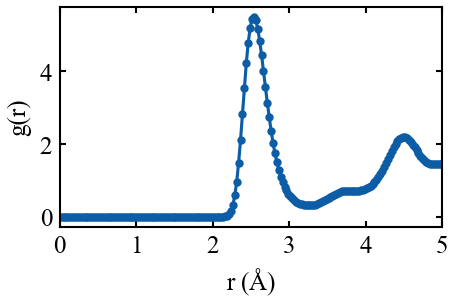

In [7]:
system.PairDistribution.plot()

## 计算中心对称参数

In [6]:
%%time
system.cal_centro_symmetry_parameter(N=12)

Parallel computing by torch.
CPU times: total: 1min 30s
Wall time: 5.33 s


## 计算原子构型熵

In [7]:
%%time
system.cal_atomic_entropy()

CPU times: total: 3min
Wall time: 6.8 s


## 计算平均原子温度

In [8]:
%%time
system.cal_atomic_temperature(amass=np.array([58.933, 58.693, 55.847, 26.982, 63.546]))

CPU times: total: 17 s
Wall time: 775 ms


## 查看计算结果

In [9]:
system.data

,type,id,x,y,z,vx,vy,vz,csp_lammps,entropy_lammps,csp,atomic_entropy,atomic_temp
0,1,1,-50.3288,1.082210,0.177314,-2.002540,0.826811,-2.007010,0.000000,-17.41350,0.000000,-17.413478,0.000000
1,2,4,-28.8172,1.793390,2.342710,-5.216100,-2.418830,-1.374500,12.171200,-2.53738,12.171250,-2.528368,411.277829
2,5,5,-28.9045,2.407650,-0.228205,-6.070550,1.127020,-0.026996,12.447300,-3.74150,12.447326,-3.734241,443.796596
3,2,6,-29.2147,-0.066835,0.402536,3.383100,1.174460,0.958068,15.121900,-3.19669,15.121857,-3.186627,518.247998
4,2,7,-28.6299,-0.802832,3.151540,1.721130,-0.533826,2.740320,13.302700,-3.65741,13.302651,-3.648348,556.794221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287144,3,1677450,329.3320,297.007000,298.394000,0.221785,0.670797,1.207740,31.990500,-3.46418,31.990519,-3.454840,471.677328
2287145,1,1677648,326.4680,296.457000,296.693000,-0.641296,-1.015300,-2.738900,0.856052,-2.99246,0.856052,-2.989518,546.993840
2287146,2,1678103,327.1730,298.542000,298.032000,2.439020,-0.024198,3.187590,1.347110,-4.00273,1.347199,-3.988562,463.425053
2287147,5,1678731,328.4260,297.622000,296.090000,2.365210,-4.841490,2.918510,14.952900,-3.21759,14.952859,-3.208695,589.763234


## 查看平均温度

In [10]:
system.data['atomic_temp'].mean() # K

545.9658931975948

## 与LAMMPS计算结果进行对比

In [11]:
# csp 对比
error = abs(system.data['csp_lammps'] - system.data['csp'])
error[error>0.1], error.max()

(Series([], dtype: float64), 0.007719748532132087)

In [12]:
# 构型熵对比, 这里由于中间数值积分的地方我不清楚lammps的具体方式,结果数值上会有一些区别。
error = abs(system.data['entropy_lammps'] - system.data['atomic_entropy'])
error[error>0.1], error.max()

(Series([], dtype: float64), 0.06396243249132372)

## 保存计算结果到dump文件中

In [13]:
%%time
system.write_dump() # 生成一个新的dump文件

CPU times: total: 39.9 s
Wall time: 39.9 s


## 建立简单晶体结构

In [14]:
%%time
FCC = mp.LatticeMaker(4.05, 'FCC', 50, 50, 50)
FCC.compute()

CPU times: total: 422 ms
Wall time: 471 ms


## 保存为data格式

In [15]:
%%time
FCC.write_data()

CPU times: total: 2.89 s
Wall time: 2.29 s
